In [29]:
import numpy as np
import random

In [30]:
# Improvement: Make terrain generation procedurally (as in the paper)

terrain = {
    "x_max": 30,
    "y_max": 30,
    "tiles": [
    [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
    [6, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6],
    [6, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 6],
    [6, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 6],
    [6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6],
    [6, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6],
    [6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6],
    [6, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6],
    [6, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6],
    [6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6],
    [6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6],
    [6, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6],
    [6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 6],
    [6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 6],
    [6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 6],
    [6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 6],
    [6, 1, 2, 1, 1, 2, 1, 1, 5, 5, 1, 1, 2, 2, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 6],
    [6, 1, 1, 1, 1, 1, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 6, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 6],
    [6, 1, 1, 1, 1, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 6, 4, 4, 4, 2, 2, 1, 1, 1, 2, 1, 1, 1, 6],
    [6, 1, 1, 1, 1, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 6, 4, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 6],
    [6, 1, 1, 1, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 6, 4, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 6],
    [6, 1, 1, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 4, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 6],
    [6, 1, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 6, 4, 4, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 6],
    [6, 1, 1, 5, 5, 5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 6, 4, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 6],
    [6, 1, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 6],
    [6, 1, 1, 5, 5, 5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 6],
    [6, 1, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 6],
    [6, 2, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 4, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 6],
    [6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 2, 1, 1, 1, 1, 1, 1, 6],
    [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]]
}

## Visualization
### Terrain

In [ ]:
import matplotlib.pyplot as plt

[]

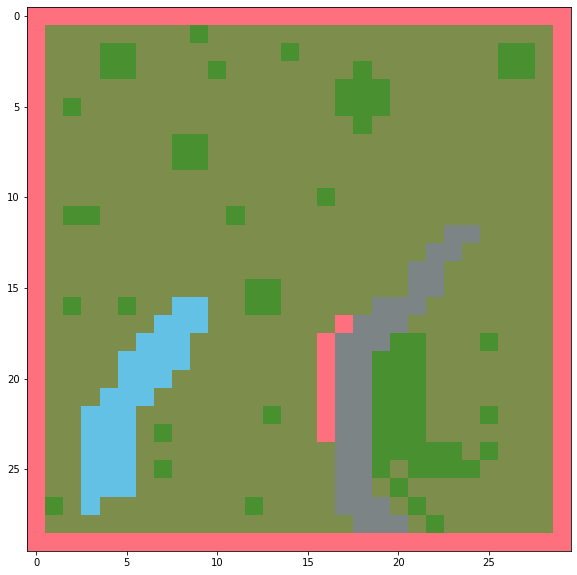

In [32]:
from matplotlib import colors
# make a color map of fixed colors
# ToDo: remake definition of this data to accept easily other values
                            # Grass, Forest, Scrub, Stone, Water, Lava
cmap = colors.ListedColormap(['#7c8d4c', '#489030', '#b5ba61', '#7c8485', '#62c1e5', '#ff707e'])
bounds=[0,1,2,3,4,5,6]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(10,10))
ax = plt.imshow(terrain['tiles'], cmap=cmap)
plt.plot()

## Data Definitions

In [ ]:

tiles = {
    1:{
        "type": "Grass",
        "passable": True,
    },
    2:{
        "type": "Forest",
        "passable": True,
        "next_state": 3  #??
    },
    3:{
        "type": "Scrub",
        "passable": True
    },
    4:{
        "type": "Stone",
        "passable": False
    },
    5:{
        "type": "Water",
        "passable": True
    },
    6:{
        "type": "Lava",
        "passable": True
    }
}

### **What the subject sees:**

**Per-tile properties:**
- **Material**: an index corresponding to the tile type
- **nEnts**:  The  number  of  occupying  entities.   
    This  istechnically learnable from the list of agents, 
    but thismay not be true for all architectures. 
    We include it forconvenience here, but may deprecate it in the future


**Per-agent properties:**
- **Lifetime**: Number of game ticks alive thus far
- **Health**: Agents die at 0 health (hp)
- **Food**: Agents begin taking damage at 0 food or water
- **Water**: Agents begin taking damage at 0 food or water
- **Position**: Row and column of the agent
- **Position** Deltas: Offsets from the agent to the observer
- **Damage**: Most recent amount of damage taken
- **Same Color**: Whether the agent is the same color (and 
    thereby is in the same population) as the observer
- **Freeze**: Whether the agent is frozen in place as a result 
    of having been hit by a mage attack


In [33]:
import collections

In [36]:
Position = collections.namedtuple('Position', 'x y')

class subject():

    def __init__():
        
        # Genetics
        self.dna = None #?
        
        # Properties
        self.lifetime = 0
        self.health   = 100
        self.food     = 100
        self.water    = 100
        self.position = self.spawn() # Position(x,y) 
        
        
    def spawn():
        if random.rand()>0.5:
            x = random.randint(1, terrain['x_max']-1)
            y = random.choice([1, terrain['y_max']-1])
        else:
            x = random.choice([1, terrain['x_max']-1])
            y = random.randint(1, terrain['y_max']-1)

        return Position(x,y)
    
    
    def 
    
            

In [ ]:
class genetic():
    def __init__():
        
        
        self.specie = specie
        self.capacity = capacity
        self.population = None # Initialized when run
        
        
        
        self.epochs = epochs
        
        
        
    def _genesis():
        self.population = [self.specie() for _ in range(self.capacity)]
        
    def run():
        
        # 1 Initialize population
        self.population = self._genesis()
        
        for epoch in self.epochs:
            